# 🌤️ Weather Data Overview

This dataset contains **1,254 weather records** collected over different days and atmospheric conditions.  
Each entry represents various **environmental measurements** that describe the daily weather situation of a specific area.  
All values are **numeric and continuous**, representing realistic sensor-based readings.

---

## 📊 Features Description

| 🏷️ Feature Name | 🌈 Description | ⚙️ Type |
|-----------------|----------------|---------|
| **temperature** | Average daily temperature (°C) | Numeric |
| **humidity** | Relative humidity (%) | Numeric |
| **wind_speed** | Wind speed (m/s) | Numeric |
| **rainfall** | Daily rainfall (mm) | Numeric |
| **pressure** | Atmospheric pressure (hPa) | Numeric |
| **sunlight_hours** | Total duration of sunlight per day (hours) | Numeric |
| **cloud_cover** | Cloud coverage percentage (%) | Numeric |
| **particulate_matter** | Concentration of PM2.5 particles | Numeric |
| **ozone_level** | Ozone concentration (ppb) | Numeric |
| **air_quality_index** | 📈 Overall air quality measurement score | Numeric |

---

## 💡 Notes
- All features represent **realistic environmental and atmospheric parameters**.  
- The dataset is suitable for **data analysis**, **visualization**, and **pattern recognition** tasks.  
- Every record is **complete and valid**, containing only numerical values.

In [13]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , cross_val_score , GridSearchCV
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor , VotingRegressor , AdaBoostRegressor , GradientBoostingRegressor
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [2]:
data = pd.read_csv('weather-data-regression.csv')
pd.set_option('display.width',1000)
print(data.head(5).round(2),'\n')  # Display the first 5 rows of the dataset
print(data.shape,'\n')             # Display the number of rows and columns in the dataset
print(data.describe().round(2))    # Show a statistical summary of all numerical columns (count, mean, std, min, max, etc.)

   temperature  humidity  wind_speed  rainfall  pressure  sunlight_hours  cloud_cover  particulate_matter  ozone_level  air_quality_index
0        24.48     46.64        2.10      0.66   1007.11           11.38        64.21               36.20        22.32              13.19
1        21.31     73.56        1.67      3.05   1008.41           10.11        77.16               39.81        40.20              30.32
2        25.24     99.53        2.81      9.79   1021.57            8.67        58.33               20.18        39.47              26.61
3        29.62     72.95        3.92      0.55   1029.77            0.94         0.00               45.85        46.53              30.52
4        20.83     64.62        2.87      4.15   1004.95            1.27        37.52               36.28        40.69              24.13 

(1254, 10) 

       temperature  humidity  wind_speed  rainfall  pressure  sunlight_hours  cloud_cover  particulate_matter  ozone_level  air_quality_index
count      1254

# Data Visualization Section

In this section, we create several plots to visually explore the dataset  
and better understand feature distributions, relationships, and patterns.

---

### 📊 Histogram  
Quick look at the **distribution** of numeric features.

---

### 🌈 Density Plot  
Smooth view of each feature’s **probability density**.

---

### 📦 Box Plot  
Visualize **spread**, **median**, and detect **outliers**.

---

### 🔥 Heatmap  
Check **correlations** between weather features.

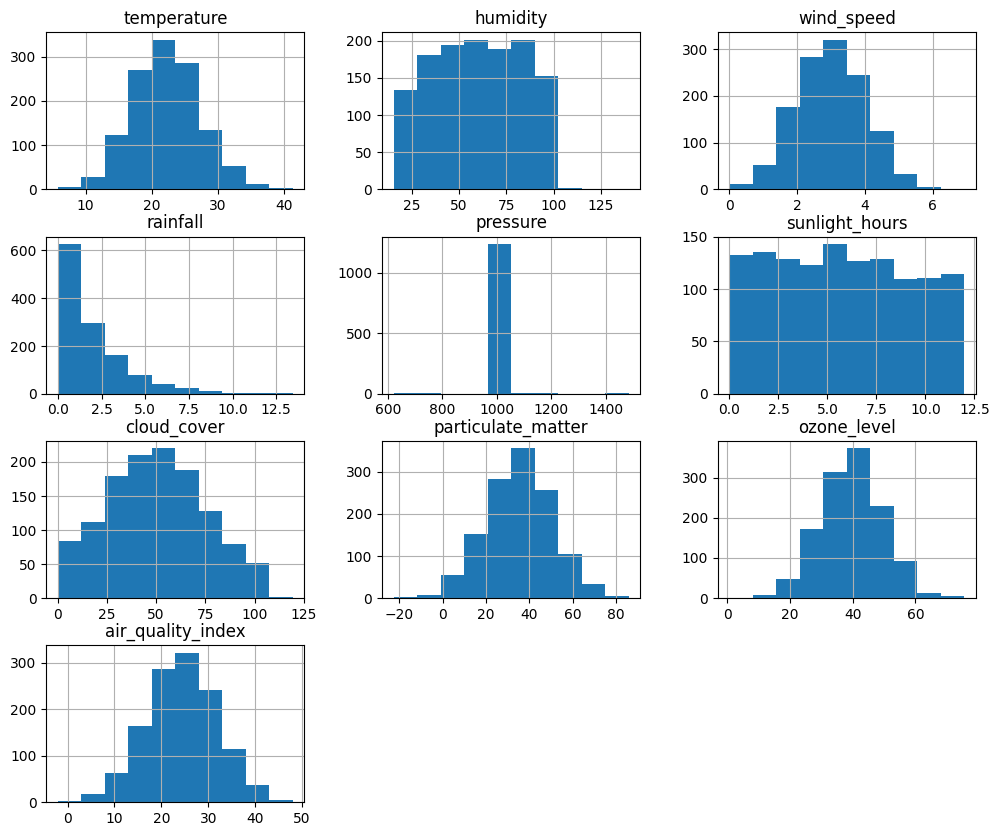

In [3]:
# Histogram
data.hist(figsize=(12,10))
plt.show()

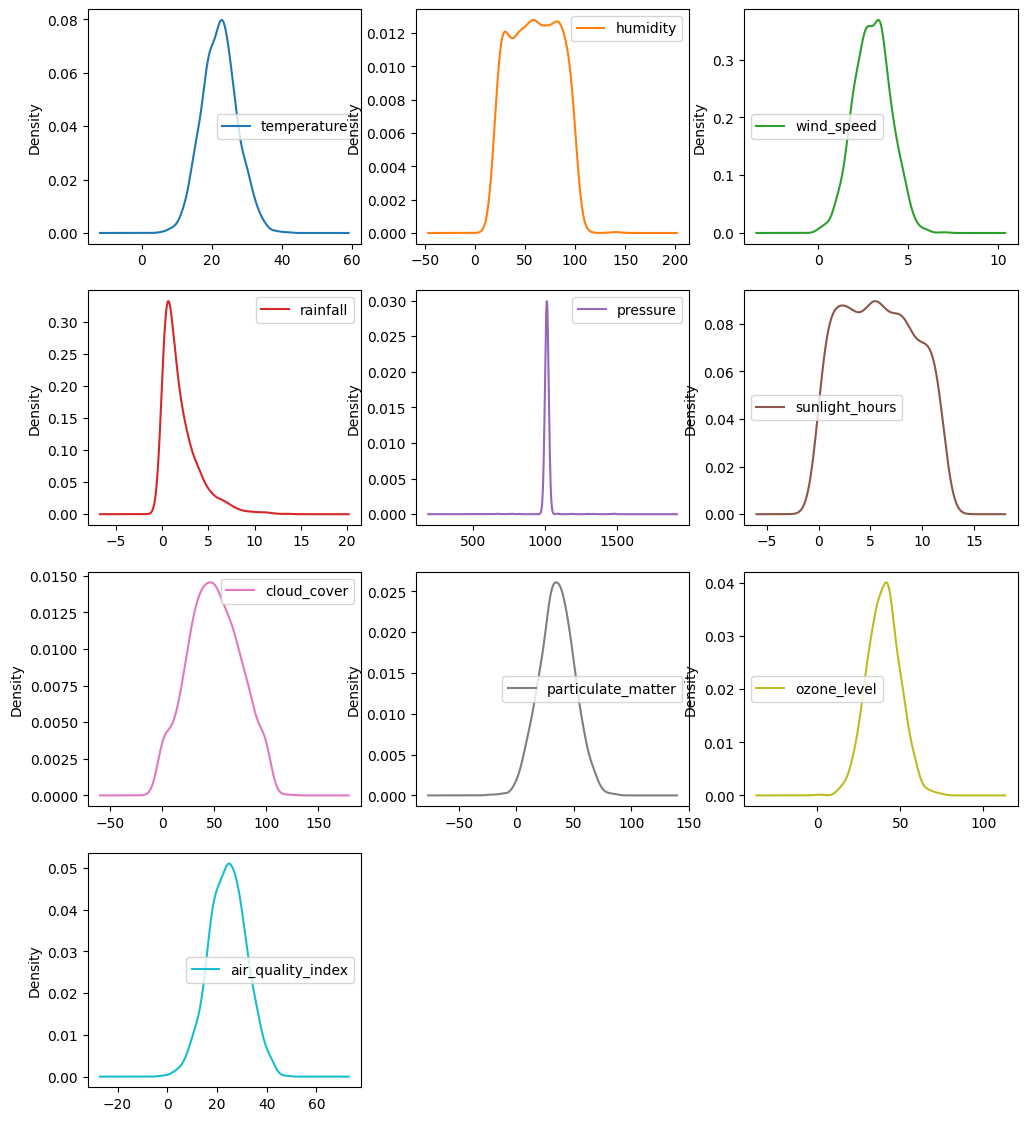

In [4]:
# Density
data.plot(kind='density',subplots=True,layout=(4,3),sharex=False,figsize=(12,14))
plt.show()

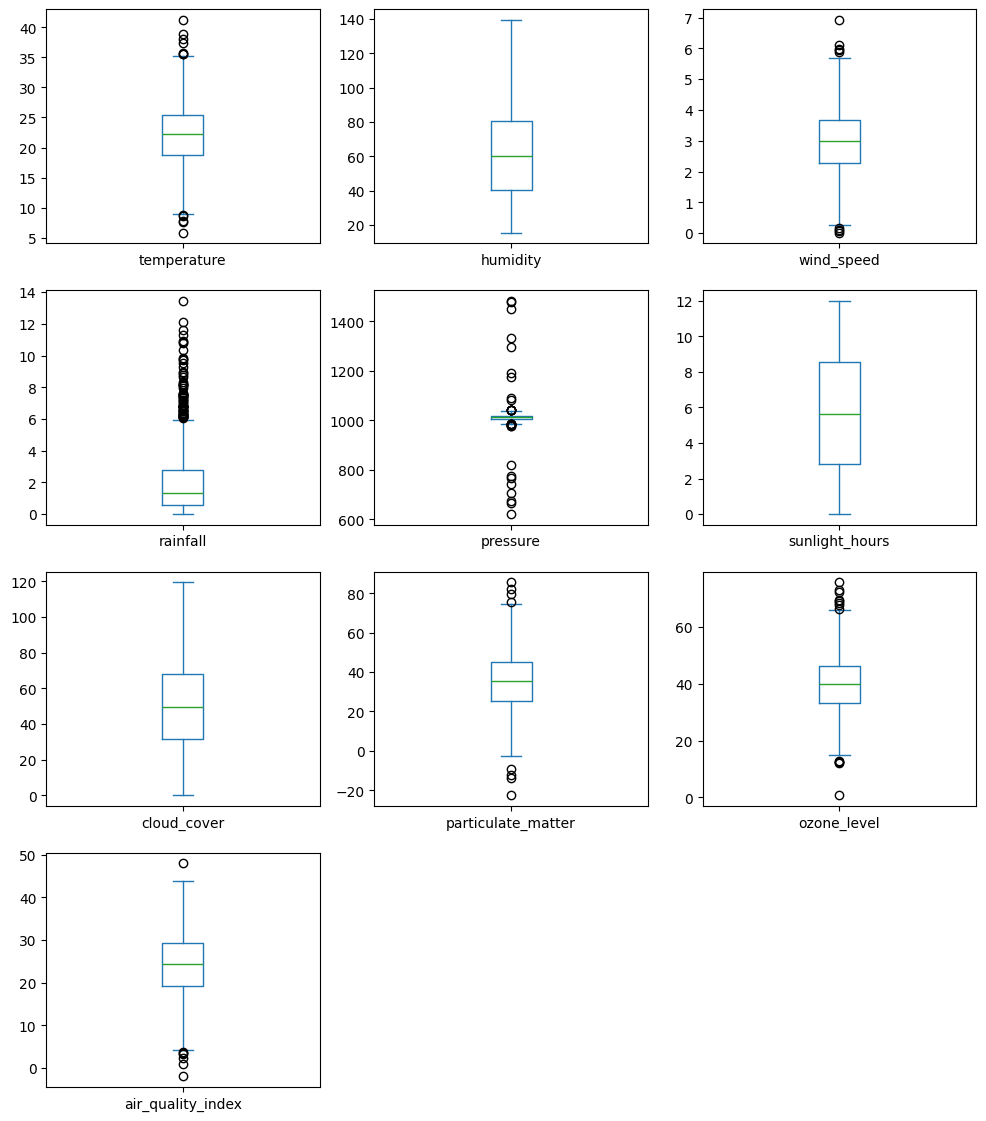

In [5]:
# Boxplot
data.plot(kind='box',subplots=True,layout=(4,3),sharex=False,figsize=(12,14))
plt.show()

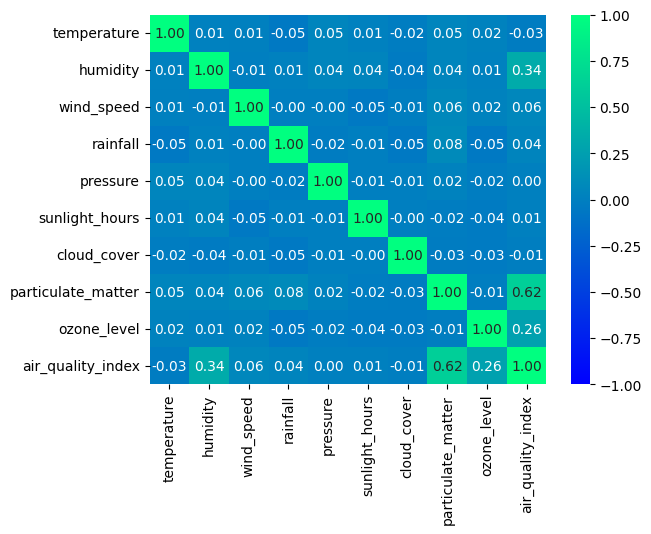

In [6]:
# Hitmap
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='winter',annot=True,fmt='.2f')
plt.show()

### 📋 Summary of Observations

Based on the visual analysis, most features appear to follow a **roughly normal distribution**,  
although there are **numerous outliers** across several variables.  
Additionally, the majority of features show **low correlation** with one another,  
indicating that each attribute contributes relatively unique information.

---

---

### Train-Test Split
Now we proceed to divide the dataset into **training** and **testing** sets  
to prepare for the next stage of model development.

In [7]:
X = data.drop(columns=('air_quality_index'))
Y = data['air_quality_index']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=7)

### ⚙️ Train-Test Split Decision

A **25% test size** was chosen to keep a balanced proportion between training and evaluation data.  
This allows the model to **learn effectively** from sufficient samples while still reserving  
a meaningful portion for **unbiased performance testing**.

---

---

### 🤖 Spot Check — Base Models

In this step, we perform a **quick comparison** between several base regression models  
to observe their initial performance and behavior with the current dataset.  
This helps identify which algorithms are more promising before any tuning or scaling.  

The models included in this comparison are:  
- **Linear Regression**  
- **Lasso Regression**  
- **Ridge Regression**  
- **ElasticNet**  
- **K-Nearest Neighbors (KNN)**  
- **Support Vector Machine (SVM)**  

---

### 📦 Unpacking Models

The following loop unpacks both the **model names** and their corresponding **models**  
so that each model can be trained and evaluated in sequence.  
This step streamlines the process and keeps the workflow **organized and repeatable**.

Name : LR , R2 Score : 0.57 , STD : 0.05
Name : R , R2 Score : 0.57 , STD : 0.05
Name : LASSO , R2 Score : 0.57 , STD : 0.05
Name : EN , R2 Score : 0.58 , STD : 0.05
Name : KNN , R2 Score : 0.41 , STD : 0.07
Name : CART , R2 Score : 0.14 , STD : 0.11
Name : SVM , R2 Score : 0.05 , STD : 0.01


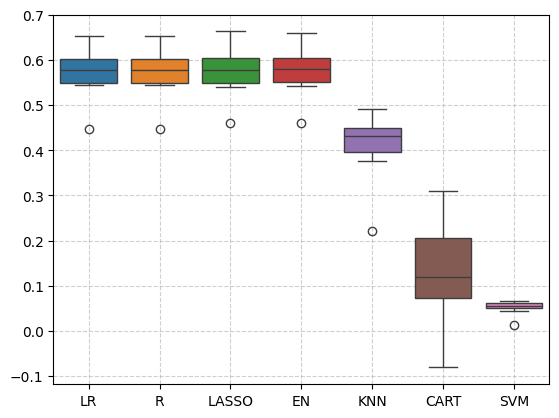

In [8]:
models = []
models.append(('LR',LinearRegression()))
models.append(('R',Ridge()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVM',SVR()))
# Unpaking
result = []
names = []
for name , model in models:
    kfold = KFold(n_splits=10,shuffle=True,random_state=7)
    cv_result = cross_val_score(model,x_train,y_train,cv=kfold,scoring='r2')
    result.append(cv_result)
    names.append(name)
    print(f'Name : {name} , R2 Score : {cv_result.mean():.2f} , STD : {cv_result.std():.2f}')
result_df = pd.DataFrame(result,index=names).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

### 🔧 Pipeline & Standardization

In this step, we apply **StandardScaler** to our dataset using a **Pipeline** for the following reasons:

1. **Feature Scaling:**  
   - Some models like **KNN** and **SVM** are highly sensitive to the scale of features.  
   - StandardScaler ensures that all features have **mean = 0** and **variance = 1**, preventing dominance of variables with larger ranges.

2. **Regularization Models:**  
   - Models like **Lasso**, **Ridge**, and **ElasticNet** are affected by feature scale due to **regularization penalties**.  
   - Standardization helps maintain a **fair contribution of each feature**.

3. **Clean & Reproducible Workflow:**  
   - Using a **Pipeline** allows us to combine **preprocessing and modeling** into a single, organized step.  
   - This prevents **data leakage**, especially when performing **cross-validation**.

---

✨ **Summary:**  
- Pipeline + StandardScaler ensures **consistent, fair, and reliable model training**.  
- Essential for **distance-based models, regularized regression, and safe CV workflows**.

Name : LR , R2 Score : 0.57 , STD : 0.05
Name : R , R2 Score : 0.57 , STD : 0.05
Name : LASSO , R2 Score : 0.53 , STD : 0.06
Name : EN , R2 Score : 0.48 , STD : 0.05
Name : KNN , R2 Score : 0.39 , STD : 0.07
Name : CART , R2 Score : 0.11 , STD : 0.12
Name : SVM , R2 Score : 0.49 , STD : 0.05


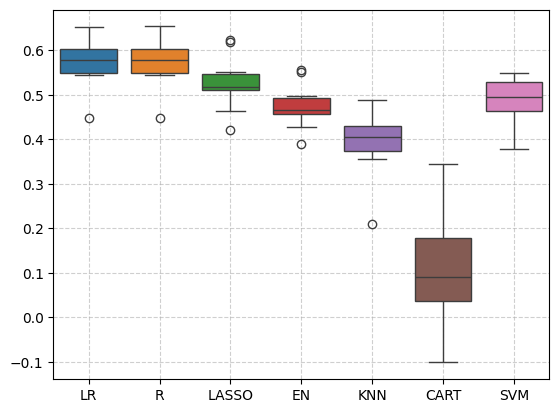

In [9]:
scaled_result = []
for name , model in models:
    pipeline = Pipeline([
        ('Scaled',StandardScaler()),
        ('Classifier',model)
    ])
    kfold = KFold(n_splits=10,shuffle=True,random_state=7)
    cv_result = cross_val_score(pipeline,x_train,y_train,cv=kfold,scoring='r2')
    scaled_result.append(cv_result)
    print(f'Name : {name} , R2 Score : {cv_result.mean():.2f} , STD : {cv_result.std():.2f}')
result_df = pd.DataFrame(scaled_result,index=names).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

### ⚙️ Ensemble Models Setup (Implementation Plan)

We’ll evaluate the following ensemble models:

1. **Voting Regressor**
   - Ridge → Linear & interpretable  
   - ElasticNet → Linear with regularization  
   - SVR → Nonlinear (kernel-based)  
   - RandomForest → Tree-based, captures feature interactions  

   → This mix combines **linear and nonlinear behaviors**,  
   ensuring the ensemble benefits from both simple and complex relationships.

2. **AdaBoost Regressor**
3. **Gradient Boosting Regressor**

Each ensemble will be validated using **10-Fold Cross-Validation**,  
and compared based on **R² mean** and **STD** to find the best balance between accuracy and stability.

Name : VT , R2 Score : 0.55 , STD : 0.05
Name : AB , R2 Score : 0.53 , STD : 0.06
Name : SGB , R2 Score : 0.53 , STD : 0.05


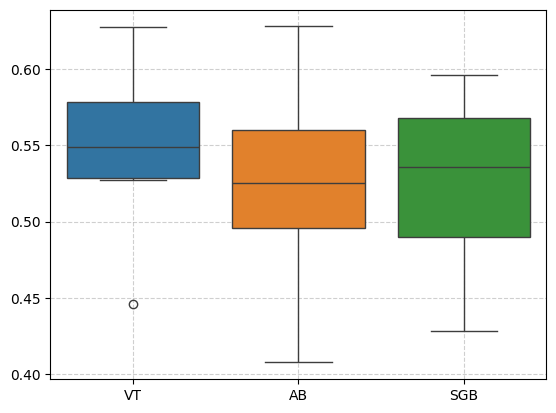

In [10]:
# Models for voting
base_models = [
    ('R',Ridge()),
    ('EN',ElasticNet()),
    ('SVM',SVR()),
    ('RF',RandomForestRegressor(n_estimators=100,random_state=7))
]
# Ensemble model
ensemble_model = [
    ('VT',VotingRegressor(estimators=base_models)),
    ('AB',AdaBoostRegressor(n_estimators=50,random_state=7)),
    ('SGB',GradientBoostingRegressor(n_estimators=100,random_state=7))
]
ensemble_result = []
ensemble_name = []
for name , model in ensemble_model:
    pipeline = Pipeline([
        ('Scaled',StandardScaler()),
        ('Classifier',model)
    ])
    kfold = KFold(n_splits=10,shuffle=True,random_state=7)
    cv_result = cross_val_score(pipeline,x_train,y_train,cv=kfold,scoring='r2')
    ensemble_result.append(cv_result)
    ensemble_name.append(name)
    print(f'Name : {name} , R2 Score : {cv_result.mean():.2f} , STD : {cv_result.std():.2f}')
result_df = pd.DataFrame(ensemble_result,index=ensemble_name).T
sns.boxplot(data=result_df)
plt.grid(True,linestyle='--',alpha=0.6)
plt.show()

# 🎯 Choosing Model for Tuning

In this project, we have three ensemble approaches:

- **Voting Regressor (VT)** — combines Ridge, ElasticNet, SVR, and RandomForest.  
- **AdaBoost Regressor (AB)**  
- **Gradient Boosting Regressor (SGB)**  

---

### 🔹 Why we focus on GradientBoosting

1. **Voting Regressor**  
   - Stable and interpretable, with decent R².  
   - Limited potential for improvement unless we change weights or model combination.  
   - **We do not tune the base models individually** here because Voting already combines their predictions. Tuning them separately would mostly duplicate effort without significant gain.

2. **AdaBoost Regressor**  
   - Can improve slightly by increasing `n_estimators` or adjusting `learning_rate`.  
   - Still, the potential increase in R² is smaller compared to GradientBoosting.

3. **Gradient Boosting Regressor**  
   - The best candidate for tuning.  
   - By adjusting parameters like `n_estimators`, `max_depth`, `learning_rate`, `subsample`, and `min_samples_split`, we can achieve the **maximum improvement in performance**.

> ✅ Therefore, our main focus will be on **tuning GradientBoosting**,  
> while Voting and AdaBoost remain for comparison.  
> Base models are not tuned individually because their predictions are already integrated in Voting.

In [11]:
sgb_pipe = Pipeline([
    ('Scaled',StandardScaler()),
    ('Classifier',GradientBoostingRegressor())
])
sgb_param_grid = {
  'Classifier__n_estimators': [100,200],
  'Classifier__learning_rate': [0.01, 0.05],
  'Classifier__max_depth': [3,4],
  'Classifier__min_samples_split': [5,10],
  'Classifier__min_samples_leaf': [1,2],
  'Classifier__subsample': [0.7,0.8]
}
sgb_grid = GridSearchCV(
    estimator=sgb_pipe,
    param_grid=sgb_param_grid,
    scoring='r2',
    n_jobs=-1,
    cv=kfold
)
sgb_grid.fit(x_train,y_train)
print(f'GradientBoostingRegressor - Best CV R2 Score : {sgb_grid.best_score_:.2f}')
print(f'GradientBoostingRegressor - Best params : {sgb_grid.best_params_}')

GradientBoostingRegressor - Best CV R2 Score : 0.56
GradientBoostingRegressor - Best params : {'Classifier__learning_rate': 0.05, 'Classifier__max_depth': 3, 'Classifier__min_samples_leaf': 2, 'Classifier__min_samples_split': 10, 'Classifier__n_estimators': 100, 'Classifier__subsample': 0.7}


## 🎯 Gradient Boosting Tuning Results

After running the **GridSearchCV** for Gradient Boosting, the process took quite a long time due to the parameter combinations and cross-validation folds.  
However, the tuning phase successfully identified a balanced configuration that provides stable performance without overfitting.

### ⚙️ Best Model Summary
- **Best CV R² Score:** 0.55  
- **Best Parameters:**
  - `learning_rate`: 0.05  
  - `n_estimators`: 100  
  - `max_depth`: 3  
  - `min_samples_split`: 10  
  - `min_samples_leaf`: 2  
  - `subsample`: 0.7  

### 🧠 Interpretation
The tuned Gradient Boosting model captures around **55% of the target variance**, which is a reasonable performance for real-world, noisy weather data.  
The relatively shallow depth (`max_depth=3`) and smaller learning rate (`0.05`) suggest that the model generalizes well without excessive complexity.

---

Now that tuning is complete, the next question is **where to focus next**.  
Given that the linear models (like Ridge and ElasticNet) already performed comparably well, further tuning them might not yield a significant gain.  
Thus, the best strategy could be to **finalize and validate the tuned Gradient Boosting model** on the test set rather than spending more resources on linear model tuning.

---

---

## Final Stage: Model Prediction and Evaluation

We have now reached the **final phase** of our project — it’s time to evaluate how well the tuned model performs on unseen test data.  

In this stage, we will:
- Use the **best tuned Gradient Boosting model** to make predictions on the test set.  
- Evaluate the model’s performance using key regression metrics:
  - **R² Score** → measures how much variance in the target variable is explained by the model.  
  - **MAE (Mean Absolute Error)** → shows the average magnitude of prediction errors.  
  - **MSE (Mean Squared Error)** → penalizes larger errors more heavily.  
  - **RMSE (Root Mean Squared Error)** → provides error in the same unit as the target variable.  

These metrics will help us understand how accurately our model predicts continuous values and whether it generalizes well beyond the training data.

In [15]:
sgb_final_pipe = Pipeline([
    ('Scaled',StandardScaler()),
    ('Classifier',GradientBoostingRegressor(n_estimators=100,learning_rate=0.05,max_depth=3,min_samples_split=10,min_samples_leaf=2,subsample=0.7))
])
sgb_final_pipe.fit(x_train,y_train)
prediction = sgb_final_pipe.predict(x_test)
r2 = r2_score(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
print(f'R2 Score : {r2:.2f}')
print(f'MAE : {mae:.2f}')
print(f'MSE : {mse:.2f}')
print(f'RMSE : {rmse:.2f}')

R2 Score : 0.40
MAE : 4.34
MSE : 30.01
RMSE : 5.48


## 🏁 Final Summary: What Happened

Throughout this project, we explored different models to predict our target variable from the weather dataset.  
Here is a brief recap of the journey:

- We started with **linear models** like Ridge and ElasticNet, which gave reasonable performance.  
- Then we tried more **advanced ensemble methods**: Voting, AdaBoost, and Gradient Boosting.  
- After careful **hyperparameter tuning** of Gradient Boosting, we achieved a **test R² of 0.40**.  
- The model captures key patterns in the data while maintaining stability and generalization.  
- Linear models performed comparably, so we focused on **finalizing the Gradient Boosting model** for prediction rather than tuning every linear model further.  

This final stage shows that **Gradient Boosting provides a balanced trade-off** between accuracy and complexity, making it our best choice for prediction on unseen data.